# Importing libraries

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

# Reading data

In [179]:
df=pd.read_csv('hotel_bookings 2.csv')

In [180]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


# Exploratory and Data analysis and Data Cleaning

In [181]:
df.shape


(119390, 32)

In [182]:
for i in df.columns:
    print(i)

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
country
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
agent
company
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [183]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [184]:
#reservation_status_date  is an object we need to convert it into a Date so we work with it
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [185]:
df.reservation_status_date.dtype

dtype('<M8[ns]')

In [186]:
#Looking at the data's statistical info
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [187]:
#we can see that there is a outliers in adr column so we need to get rid of it
#Removing outliers
# Calculate the first and third quartiles of the data
q1, q3 = df['adr'].quantile([0.25, 0.75])

# Calculate the IQR
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the data points outside the bounds
outliers = (df['adr'] < lower_bound) | (df['adr'] > upper_bound)

# Remove the outliers from the DataFrame
df = df[~outliers]

In [188]:
len(df['days_in_waiting_list'].unique())

127

In [189]:
#Deleting outlier for waiting days
# Calculate the first and third quartiles of the data
q1, q3 = df['days_in_waiting_list'].quantile([0.01, 0.99])

# Calculate the IQR
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the data points outside the bounds
outliers = (df['days_in_waiting_list'] < lower_bound) | (df['days_in_waiting_list'] > upper_bound)

# Remove the outliers from the DataFrame
df = df[~outliers]

In [190]:
len(df['days_in_waiting_list'].unique())

117

In [191]:
#looking at freq and unique values for the catigorical info
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,115369,115369,115369,114889,115369,115369,115369,115369,115369,115369,115369
unique,2,12,5,175,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,77812,11971,89772,47147,53786,94793,85133,73270,100702,86083,72725


In [192]:
#dealing with null values
#we wanna see what columns include null values and percentage of the missing values
for col,val in df.isnull().sum().items():
    if val>0:
        print(f'{col}, {val/df.shape[0]:.4f}')

children, 0.0000
country, 0.0042
agent, 0.1385
company, 0.9412


In [193]:
#we can remove agent and country columns and we remove the rows with null values for country and children
df.drop(['company','agent'],axis=1,inplace=True)

In [194]:
df.dropna(inplace=True)

In [195]:
#we can see that we don't have any null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [196]:
#and we have no outliers that we can notice from this table too
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000,114885.000000
mean,0.370571,104.795369,2016.146103,27.037951,15.770161,0.922836,2.484154,1.847804,0.083074,0.007503,0.032694,0.090012,0.135536,0.217296,1.856361,97.243347,0.059155,0.563059
std,0.482960,107.125215,0.707640,13.740513,8.784295,0.995677,1.899100,0.579136,0.350793,0.095124,0.177834,0.860273,1.509716,0.648129,12.750663,40.564083,0.239176,0.785610
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.650000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,187.000000,211.030000,8.000000,5.000000


# Data Analysis and visualization

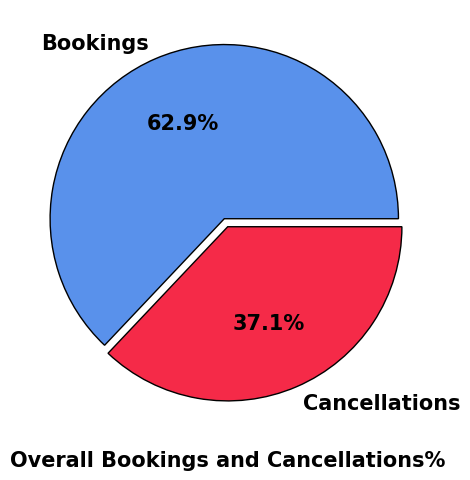

In [208]:
plt.figure(figsize=(14, 5))
colors= ['#5991eb', '#f52a48']
ax=plt.pie(data=df, x=df.is_canceled.value_counts().values ,
            labels = ['Bookings', 'Cancellations'], colors = colors 
            , autopct='%.1f%%',
            wedgeprops = {"edgecolor" : "black",},
           explode = (0.05, 0),
          textprops={'fontsize':15, 'weight':'bold'})

plt.xlabel('Overall Bookings and Cancellations%',fontsize=15,weight='bold')
plt.rcParams['font.size'] = 13.0
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

### 1-type of the hotel and cancelation numbers


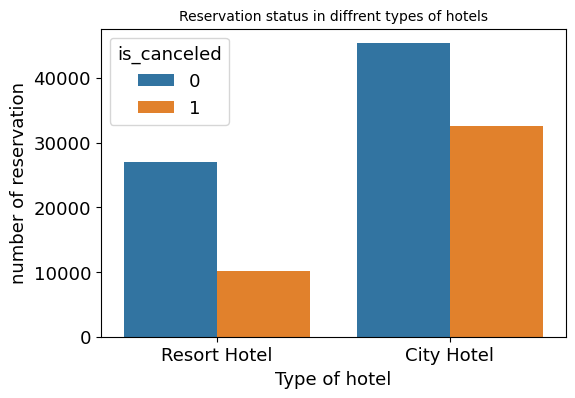

In [198]:
plt.figure(figsize=(6,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df)
leg_labels,_=ax1.get_legend_handles_labels()
plt.title('Reservation status in diffrent types of hotels',size=10)
plt.xlabel('Type of hotel')
plt.ylabel('number of reservation')
plt.show()

### What we can understand from the figure above:
*We can see that the number of cancelation is way higher in city hotels


## 2-checking cancellation numbers each month and adr for each month


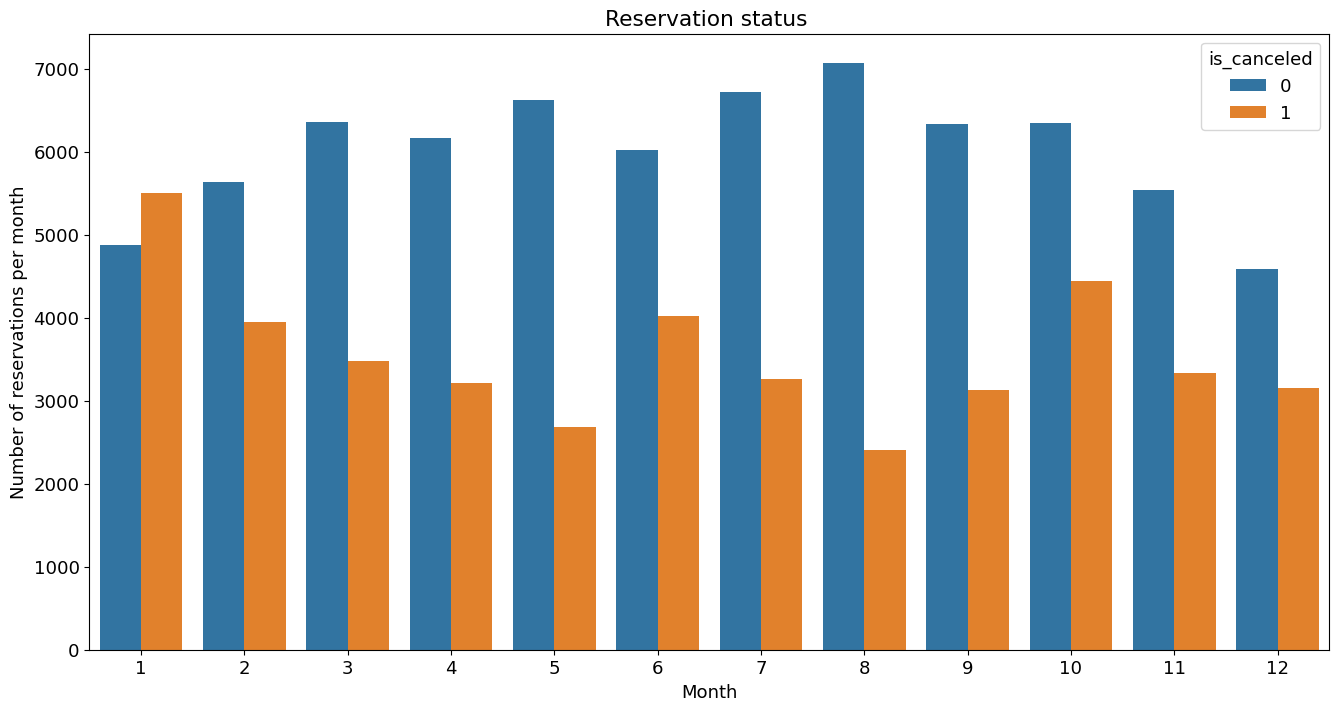

In [199]:
df['month']=df.reservation_status_date.dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,width=0.8)
plt.title('Reservation status ')
plt.xlabel('Month')
plt.ylabel('Number of reservations per month')
plt.show()

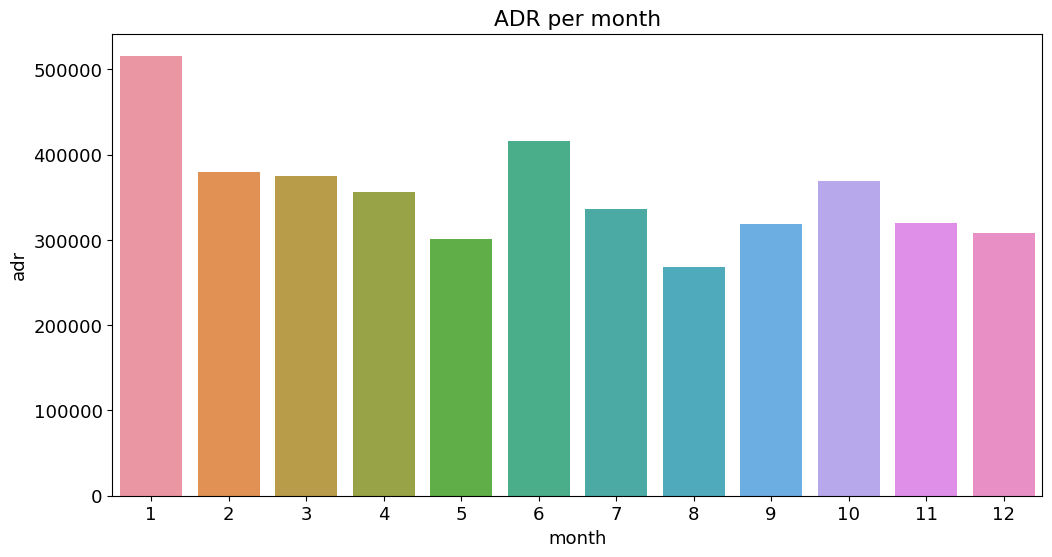

In [200]:
plt.figure(figsize=(12,6))
df_cancelled = df[df['is_canceled'] == 1]
df_cancelled_by_month = df_cancelled.groupby('month')[['adr']].sum().reset_index()
sns.barplot(x='month', y='adr', data=df_cancelled_by_month)
plt.title('ADR per month')
plt.show()

## 3-checking the top 10 countries that cancel the reservation

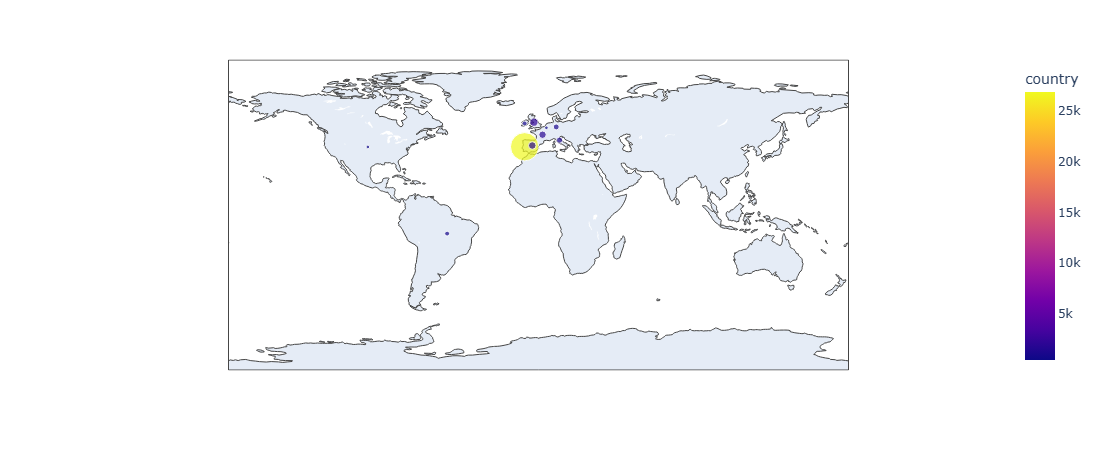

In [252]:
country_cancel=df[df['is_canceled']==1]
top_10_country=country_cancel['country'].value_counts()[:10]
country_count=top_10_country.values
country_name=top_10_country.index
#plotting the top 10 countries
fig=px.scatter_geo(data_frame=top_10_country,locations=country_name,size=country_count,
color='country', hover_data={'country':False})
fig.show()

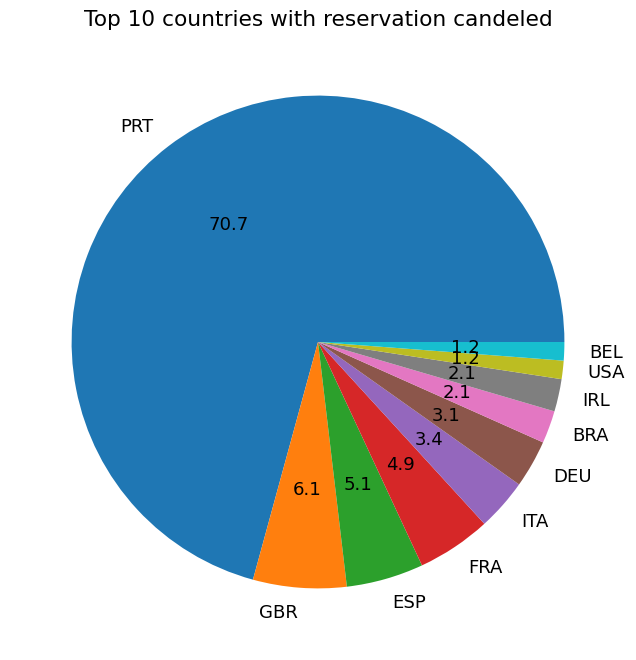

In [251]:
country_cancel=df[df['is_canceled']==1]
top_10_country=country_cancel['country'].value_counts()[:10]
#plotting the top 10 countries
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation candeled')
plt.pie(top_10_country,autopct='%.1f',labels=top_10_country.index)
plt.show()

## 4-checking if higher prices cause more cancellations

In [203]:
canceled=df[df['is_canceled']==1]
adr_canceled=canceled.groupby('reservation_status_date')[['adr']].mean()
adr_canceled=adr_canceled.sort_values('reservation_status_date',ascending=True)
not_canceled=df[df['is_canceled']==0]
adr_not_canceled=not_canceled.groupby('reservation_status_date')[['adr']].mean()
adr_not_canceled=adr_not_canceled.sort_values('reservation_status_date',ascending=True)



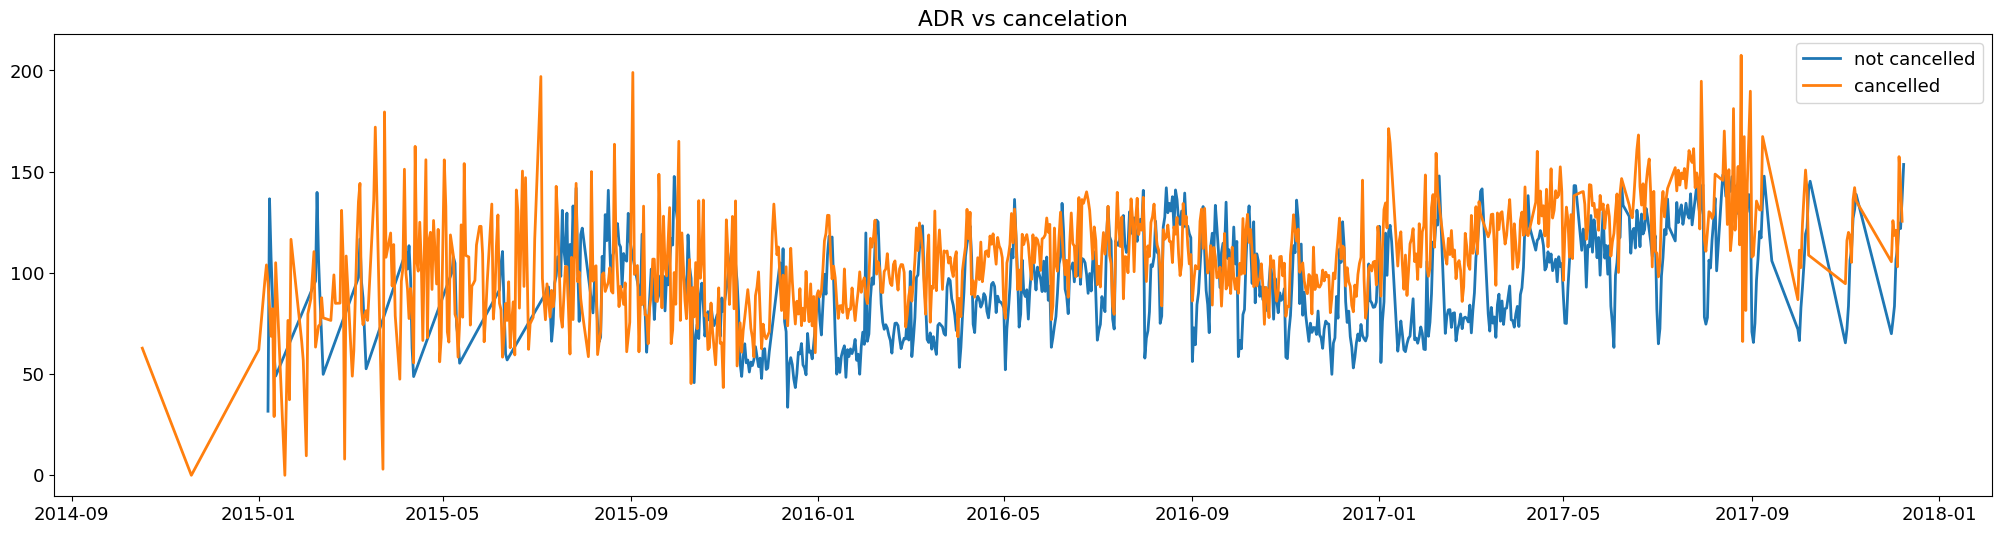

In [204]:
#plotting
plt.figure(figsize=(25,6))
plt.title('ADR vs cancelation')
plt.plot(adr_not_canceled.index,adr_not_canceled['adr'],label='not cancelled',linewidth=2)
plt.plot(adr_canceled.index,adr_canceled['adr'],linewidth=2,label='cancelled')
plt.legend()

# Market Segment


Text(0.5, 1.0, 'Bookings by market segment')

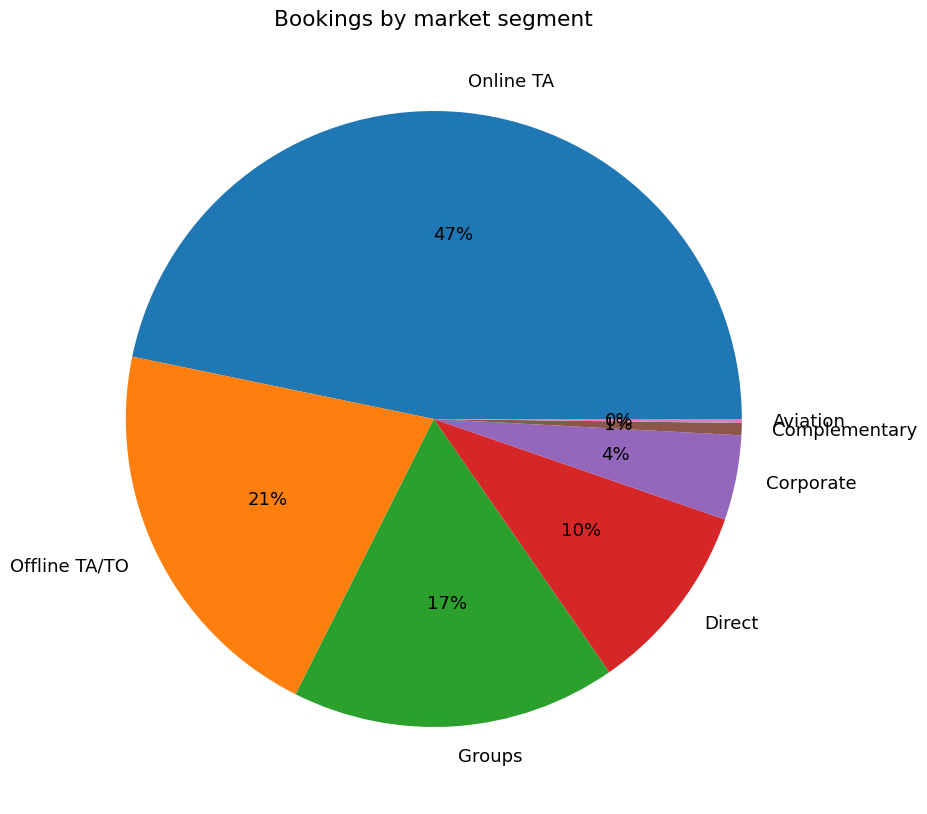

In [253]:
d = df['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")